## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.10, 0.25, 0.35]
neurons1=[512, 256, 128] #num_neurons
neurons2=[512, 256, 128, 64] #num_neurons
neurons3=[256, 512, 256, 128, 64, 32] #num_neurons
NEURONS = [neurons1, neurons2, neurons3]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
i = 0
for item in NEURONS:
    for Drop in Dropout_EXP:
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=item, drp_ratio=Drop)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "layer-%s-dropout-%s" % (str(i+3), str(Drop))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-accuracy': train_acc,
                                 'valid-accuracy': valid_acc}
    i+=1

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0   

196/196 [==============================] - 2s 11ms/step - loss: 1.1161 - accuracy: 0.6015 - val_loss: 1.2918 - val_accuracy: 0.5424
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.1096 - accuracy: 0.6017 - val_loss: 1.2814 - val_accuracy: 0.5420
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.1010 - accuracy: 0.6068 - val_loss: 1.2932 - val_accuracy: 0.5396
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None,

196/196 [==============================] - 2s 11ms/step - loss: 1.3227 - accuracy: 0.5279 - val_loss: 1.3223 - val_accuracy: 0.5263
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3100 - accuracy: 0.5323 - val_loss: 1.3241 - val_accuracy: 0.5209
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3044 - accuracy: 0.5332 - val_loss: 1.3214 - val_accuracy: 0.5268
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2981 - accuracy: 0.5376 - val_loss: 1.3202 - val_accuracy: 0.5222
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2914 - accuracy: 0.5393 - val_loss: 1.3384 - val_accuracy: 0.5191
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2806 - accuracy: 0.5425 - val_loss: 1.3310 - val_accuracy: 0.5228
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

196/196 [==============================] - 2s 11ms/step - loss: 1.4479 - accuracy: 0.4851 - val_loss: 1.3799 - val_accuracy: 0.5043
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4414 - accuracy: 0.4830 - val_loss: 1.3783 - val_accuracy: 0.5086
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4407 - accuracy: 0.4838 - val_loss: 1.3836 - val_accuracy: 0.5008
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4352 - accuracy: 0.4888 - val_loss: 1.3769 - val_accuracy: 0.5074
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4284 - accuracy: 0.4895 - val_loss: 1.3825 - val_accuracy: 0.5078
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4223 - accuracy: 0.4905 - val_loss: 1.3664 - val_accuracy: 0.5064
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4135 - accuracy: 0.4943 - val_loss: 1.3621 - val_accuracy: 0.5122
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.2358 - accuracy: 0.5580 - val_loss: 1.3284 - val_accuracy: 0.5239
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2302 - accuracy: 0.5606 - val_loss: 1.3057 - val_accuracy: 0.5335
Epoch 39/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2217 - accuracy: 0.5613 - val_loss: 1.3172 - val_accuracy: 0.5268
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2087 - accuracy: 0.5664 - val_loss: 1.3059 - val_accuracy: 0.5306
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 1.1975 - accuracy: 0.5712 - val_loss: 1.3133 - val_accuracy: 0.5295
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1897 - accuracy: 0.5742 - val_loss: 1.3217 - val_accuracy: 0.5239
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1846 - accuracy: 0.5756 - val_loss: 1.3327 - val_accuracy: 0.5266
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.4765 - accuracy: 0.4717 - val_loss: 1.4100 - val_accuracy: 0.4939
Epoch 33/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4722 - accuracy: 0.4730 - val_loss: 1.4000 - val_accuracy: 0.4991
Epoch 34/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4631 - accuracy: 0.4768 - val_loss: 1.4001 - val_accuracy: 0.4992
Epoch 35/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4556 - accuracy: 0.4802 - val_loss: 1.3951 - val_accuracy: 0.4954
Epoch 36/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4491 - accuracy: 0.4809 - val_loss: 1.3869 - val_accuracy: 0.5038
Epoch 37/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4378 - accuracy: 0.4886 - val_loss: 1.3905 - val_accuracy: 0.4974
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4347 - accuracy: 0.4867 - val_loss: 1.3808 - val_accuracy: 0.5056
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.6653 - accuracy: 0.4010 - val_loss: 1.5467 - val_accuracy: 0.4483
Epoch 28/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6588 - accuracy: 0.4002 - val_loss: 1.5303 - val_accuracy: 0.4541
Epoch 29/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6467 - accuracy: 0.4067 - val_loss: 1.5260 - val_accuracy: 0.4528
Epoch 30/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6425 - accuracy: 0.4102 - val_loss: 1.5243 - val_accuracy: 0.4537
Epoch 31/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6360 - accuracy: 0.4142 - val_loss: 1.5136 - val_accuracy: 0.4600
Epoch 32/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6281 - accuracy: 0.4157 - val_loss: 1.4996 - val_accuracy: 0.4599
Epoch 33/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6236 - accuracy: 0.4154 - val_loss: 1.5146 - val_accuracy: 0.4593
Epoc

Epoch 19/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5813 - accuracy: 0.4300 - val_loss: 1.5201 - val_accuracy: 0.4510
Epoch 20/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5711 - accuracy: 0.4323 - val_loss: 1.4906 - val_accuracy: 0.4693
Epoch 21/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5563 - accuracy: 0.4380 - val_loss: 1.4826 - val_accuracy: 0.4705
Epoch 22/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5405 - accuracy: 0.4437 - val_loss: 1.4750 - val_accuracy: 0.4698
Epoch 23/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5264 - accuracy: 0.4501 - val_loss: 1.4716 - val_accuracy: 0.4763
Epoch 24/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5158 - accuracy: 0.4543 - val_loss: 1.4581 - val_accuracy: 0.4799
Epoch 25/50
196/196 [==============================] - 2s 9ms/step - loss: 1.5053 - accuracy: 0.4589 - val_loss: 1.4618 - val_accuracy: 0.4755

Epoch 11/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9505 - accuracy: 0.2530 - val_loss: 1.8422 - val_accuracy: 0.2939
Epoch 12/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9318 - accuracy: 0.2613 - val_loss: 1.8287 - val_accuracy: 0.3047
Epoch 13/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9140 - accuracy: 0.2671 - val_loss: 1.8137 - val_accuracy: 0.3066
Epoch 14/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8991 - accuracy: 0.2728 - val_loss: 1.7843 - val_accuracy: 0.3141
Epoch 15/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8804 - accuracy: 0.2782 - val_loss: 1.7786 - val_accuracy: 0.3200
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8691 - accuracy: 0.2820 - val_loss: 1.7611 - val_accuracy: 0.3227
Epoch 17/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8580 - accuracy: 0.2898 - val_loss: 1.7490 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 2.3026 - accuracy: 0.1052 - val_loss: 2.2999 - val_accuracy: 0.1494
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3005 - accuracy: 0.1080 - val_loss: 2.2953 - val_accuracy: 0.1773
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2977 - accuracy: 0.1135 - val_loss: 2.2868 - val_accuracy: 0.1744
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2868 - accuracy: 0.1224 - val_loss: 2.2593 - val_accuracy: 0.1723
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2588 - accuracy: 0.1384 - val_loss: 2.1976 - val_accuracy: 0.1696
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2125 - accuracy: 0.1526 - val_loss: 2.1366 - val_accuracy: 0.1860
Epoch 8/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1676 - accuracy: 0.1680 - val_loss: 2.0874 - val_accuracy: 0.2028
Epoch 9/50

In [14]:
results.keys()

dict_keys(['layer-3-dropout-0.1', 'layer-3-dropout-0.25', 'layer-3-dropout-0.35', 'layer-4-dropout-0.1', 'layer-4-dropout-0.25', 'layer-4-dropout-0.35', 'layer-5-dropout-0.1', 'layer-5-dropout-0.25', 'layer-5-dropout-0.35'])

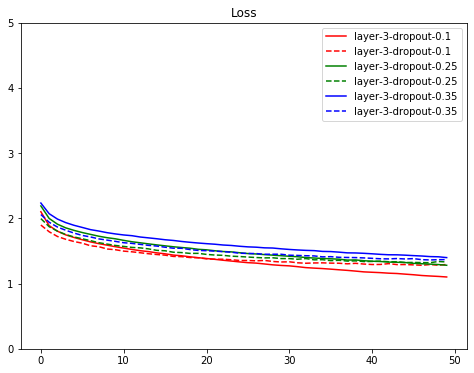

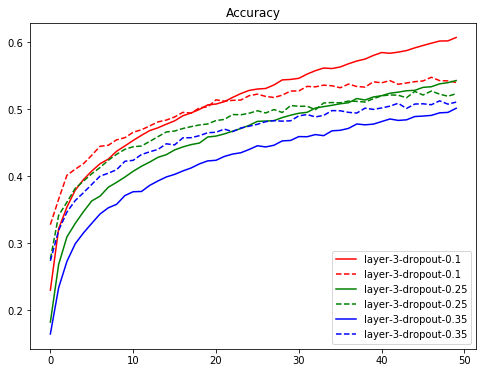

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [3,4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [3,4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

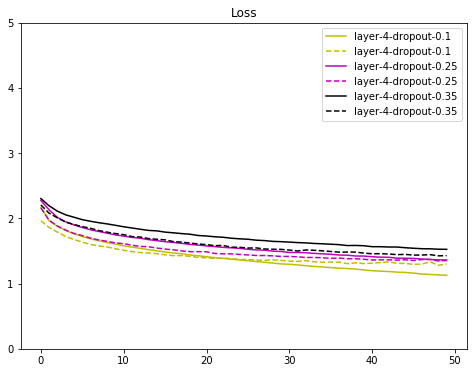

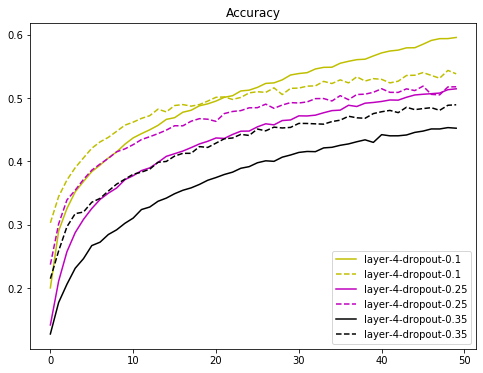

In [17]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

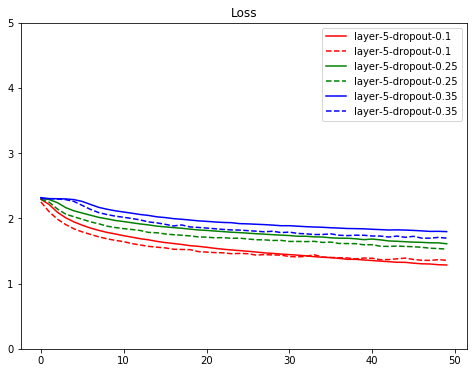

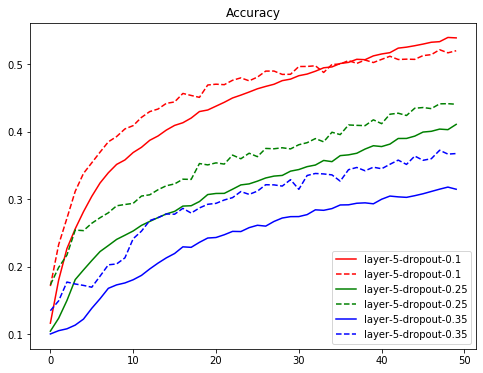

In [18]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

dropout越多，結果越差
層數越多越差